# HOSPITAL READMISSION

Helping a hospital group better understand patient readmissions, using the ten years of information on patients readmitted to the hospital after being discharged. To assess if initial diagnoses, number of procedures, or other variables could be helpful for better understanding the probability of readmission.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
a = pd.read_csv("hospital_readmissions.csv")
a

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no


In [66]:
a.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [68]:
a.tail()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no
24999,[50-60),10,37,1,24,0,0,0,Missing,Other,Diabetes,Circulatory,no,no,no,no,yes


In [70]:
a.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [72]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [74]:
a.shape

(25000, 17)

In [76]:
b = a.fillna(method="ffill")
b

C:\Users\laswi\AppData\Local\Temp\ipykernel_11592\1304082951.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  b = a.fillna(method="ffill")


,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no


In [78]:
b.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')

#  LABEL ENCODER

In [81]:
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
c = LabelEncoder()
c

LabelEncoder()

In [83]:
age1 = c.fit_transform(b["age"])
medical_specialty2 = c.fit_transform(b["medical_specialty"])
diag_13 = c.fit_transform(b["diag_1"])
diag_24 = c.fit_transform(b["diag_2"])
diag_35 = c.fit_transform(b["diag_3"])
glucose_test6 = c.fit_transform(b["glucose_test"])
A1Ctest7 = c.fit_transform(b["A1Ctest"])
change8 = c.fit_transform(b["change"])
diabetes_med9 = c.fit_transform(b["diabetes_med"])
readmitted10 = c.fit_transform(b["readmitted"])


b.age = age1
b.medical_specialty	= medical_specialty2
b.diag_1 = diag_13
b.diag_2 = diag_24
b.diag_3 = diag_35
b.glucose_test = glucose_test6
b.A1Ctest = A1Ctest7
b.change = change8
b.diabetes_med = diabetes_med9
b.readmitted = readmitted10


In [85]:
b

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,3,8,72,1,18,2,0,0,4,0,7,6,1,1,0,1,0
1,3,3,34,2,13,0,0,0,5,6,6,6,1,1,0,1,0
2,1,5,45,0,18,0,0,0,4,0,0,0,1,1,1,1,1
3,3,2,36,0,12,1,0,0,4,0,6,1,1,1,1,1,1
4,2,1,42,0,7,0,0,0,3,6,0,7,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,4,14,77,1,30,0,0,0,4,0,6,0,1,2,0,0,1
24996,4,2,66,0,24,0,0,0,4,2,3,6,1,0,1,1,1
24997,3,5,12,0,6,0,1,0,4,6,6,6,2,1,0,0,1
24998,3,2,61,3,15,0,0,0,2,7,1,6,1,1,1,1,0


#  CORRELATION

In [88]:
b.corr()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
age,1.000000,0.086268,0.028796,-0.093356,-0.039604,0.019860,-0.021917,-0.070886,-0.027602,-0.017524,-0.011906,-0.022512,0.003367,0.064382,-0.053464,-0.025739,0.030289
time_in_hospital,0.086268,1.000000,0.328326,0.179249,0.449415,-0.011309,0.076916,-0.013115,0.043180,0.030004,0.088306,0.074885,-0.039572,-0.024386,0.107344,0.064219,0.043141
n_lab_procedures,0.028796,0.328326,1.000000,0.048827,0.271741,-0.004309,0.043713,-0.004929,-0.073420,-0.026125,0.052641,0.067031,-0.029715,-0.091193,0.062321,0.031342,0.032970
n_procedures,-0.093356,0.179249,0.048827,1.000000,0.368681,-0.034796,-0.069078,-0.042906,-0.017974,-0.241709,-0.121367,-0.064316,-0.007961,0.001345,-0.000009,-0.010414,-0.044467
n_medications,-0.039604,0.449415,0.271741,0.368681,1.000000,0.043185,0.065572,0.012944,0.088286,-0.050642,0.003524,0.009366,-0.040051,-0.017831,0.248529,0.195735,0.036871
n_outpatient,0.019860,-0.011309,-0.004309,-0.034796,0.043185,1.000000,0.127736,0.096912,0.052684,0.010055,0.024598,0.013625,0.008546,-0.006783,0.025531,0.014043,0.095487
n_inpatient,-0.021917,0.076916,0.043713,-0.069078,0.065572,0.127736,1.000000,0.220285,0.013816,0.016539,0.039194,0.025064,-0.011417,0.016944,0.012442,0.020978,0.212480
n_emergency,-0.070886,-0.013115,-0.004929,-0.042906,0.012944,0.096912,0.220285,1.000000,-0.016577,0.030374,0.044488,0.029028,-0.002418,0.004205,0.029221,0.017901,0.093519
medical_specialty,-0.027602,0.043180,-0.073420,-0.017974,0.088286,0.052684,0.013816,-0.016577,1.000000,0.100901,0.067086,0.030745,0.005818,0.049592,-0.029648,-0.014970,-0.018145
diag_1,-0.017524,0.030004,-0.026125,-0.241709,-0.050642,0.010055,0.016539,0.030374,0.100901,1.000000,0.169757,0.083559,0.000308,0.029283,0.019518,0.007242,-0.020091


In [217]:
d =b.drop(["diag_3" ,"glucose_test" ,"A1Ctest"], axis = 1)
d

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,change,diabetes_med,readmitted
0,3,8,72,1,18,2,0,0,4,0,7,0,1,0
1,3,3,34,2,13,0,0,0,5,6,6,0,1,0
2,1,5,45,0,18,0,0,0,4,0,0,1,1,1
3,3,2,36,0,12,1,0,0,4,0,6,1,1,1
4,2,1,42,0,7,0,0,0,3,6,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,4,14,77,1,30,0,0,0,4,0,6,0,0,1
24996,4,2,66,0,24,0,0,0,4,2,3,1,1,1
24997,3,5,12,0,6,0,1,0,4,6,6,0,0,1
24998,3,2,61,3,15,0,0,0,2,7,1,1,1,0


#  TRAIN_TEST_SPLIT

In [93]:
from sklearn.model_selection import train_test_split

In [219]:
x = d[['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency', 'medical_specialty', 'diag_1','diag_2', 'change', 'diabetes_med']]
x

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,change,diabetes_med
0,3,8,72,1,18,2,0,0,4,0,7,0,1
1,3,3,34,2,13,0,0,0,5,6,6,0,1
2,1,5,45,0,18,0,0,0,4,0,0,1,1
3,3,2,36,0,12,1,0,0,4,0,6,1,1
4,2,1,42,0,7,0,0,0,3,6,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,4,14,77,1,30,0,0,0,4,0,6,0,0
24996,4,2,66,0,24,0,0,0,4,2,3,1,1
24997,3,5,12,0,6,0,1,0,4,6,6,0,0
24998,3,2,61,3,15,0,0,0,2,7,1,1,1


In [221]:
y = d[["readmitted"]]
y

,readmitted
0,0
1,0
2,1
3,1
4,0
...,...
24995,1
24996,1
24997,1
24998,0


In [223]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)
xtrain,xtest,ytrain,ytest

(       age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
 23311    1                 3                67             0             12   
 23623    1                 1                 3             2             16   
 1020     1                 2                31             1             19   
 12645    4                 2                43             2              9   
 1533     2                 7                35             1             21   
 ...    ...               ...               ...           ...            ...   
 21575    2                 7                44             0             27   
 5390     1                 4                62             0             33   
 860      3                 3                13             1             32   
 15795    2                 8                58             4             18   
 23654    2                 1                45             4             12   
 
        n_outpatient  n_inpatient  n_e

#  LOGISTIC REGRESSION

In [226]:
from sklearn.linear_model import LogisticRegression

In [228]:
e = LogisticRegression()
e

LogisticRegression()

In [230]:
e.fit(xtrain,ytrain)

C:\Users\laswi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\laswi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [232]:
e.score(xtest,ytest)

0.6108

In [234]:
e.predict(xtest)

array([1, 0, 0, ..., 1, 0, 0])

# CONFUSION MATRIX OF LOGISTIC REGRESSION

In [375]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix

In [377]:
o=k.predict(xtest)
o

array([0, 0, 0, ..., 1, 0, 1])

In [379]:
p=confusion_matrix(o,ytest)
p

array([[1827, 1146],
       [ 831, 1196]], dtype=int64)

In [381]:
import seaborn as sn

<Figure size 1000x600 with 0 Axes>

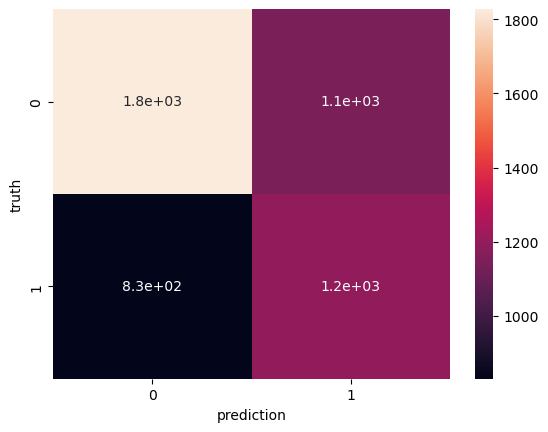

<Figure size 1000x600 with 0 Axes>

In [383]:
sn.heatmap(p,annot=True)
plt.xlabel('prediction')
plt.ylabel('truth')
plt.figure(figsize=(10,6))

This confusion matrix shows the performance of linear model. In this model there are 1827 true positives, 1146 false negatives, 831 false positives and 1196 true negatives. On the x axis we give the predicted values and on the y axis we give the actual values.

#  SVM(SUPPORT VECTOR MACHINE)

In [372]:
from sklearn.svm import SVC

In [239]:
f = SVC()
f.fit(xtrain,ytrain)

C:\Users\laswi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [255]:
f.score(xtest,ytest)

0.6032

In [257]:
f.predict(xtest)

array([1, 0, 0, ..., 1, 0, 0])

#  KERNALS - LINEAR, POLY , RBF

#  LINEAR

In [261]:
g = SVC(kernel = 'linear')
g.fit(xtrain,ytrain)

C:\Users\laswi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [263]:
g.score(xtest,ytest)

0.606

In [265]:
g.predict(xtest)

array([1, 0, 0, ..., 1, 0, 0])

#  POLY

In [268]:
h = SVC(kernel = 'poly')
h.fit(xtrain,ytrain)

C:\Users\laswi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

In [270]:
h.score(xtest,ytest)

0.5844

In [272]:
h.predict(xtest)

array([0, 0, 0, ..., 1, 0, 0])

#  RBF

In [275]:
i = SVC(kernel = 'rbf')
i.fit(xtrain,ytrain)

C:\Users\laswi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [277]:
i.score(xtest,ytest)

0.6032

In [278]:
i.predict(xtest)

array([1, 0, 0, ..., 1, 0, 0])

#  DECISION TREE CLASSIFIER

In [282]:
j = tree.DecisionTreeClassifier()
j.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [284]:
j.score(xtest,ytest)

0.549

In [286]:
j.predict(xtest)

array([0, 1, 0, ..., 1, 0, 0])

In [288]:
j.predict(xtest)

array([0, 1, 0, ..., 1, 0, 0])

#  RANDOM FOREST CLASSIFIER

In [291]:
from sklearn.ensemble import RandomForestClassifier

In [293]:
k = RandomForestClassifier(n_estimators = 60)
k.fit(xtrain,ytrain)

C:\Users\laswi\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=60)

In [295]:
k.score(xtest,ytest)

0.6046

In [297]:
k.predict(xtest)

array([0, 0, 0, ..., 1, 0, 1])

#  K-NEIGHBORS CLASSIFIER

In [300]:
from sklearn.neighbors import KNeighborsClassifier
l = KNeighborsClassifier(n_neighbors = 4)

In [302]:
l.fit(xtrain,ytrain)

C:\Users\laswi\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [304]:
l.score(xtest,ytest)

0.5522

In [305]:
l.predict(xtest)

array([0, 0, 0, ..., 0, 0, 0])

#  NAIVE_BAYES

In [309]:
from sklearn.naive_bayes import GaussianNB
m = GaussianNB()

In [311]:
m.fit(xtrain,ytrain)

C:\Users\laswi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [313]:
m.score(xtest,ytest)

0.5914

In [315]:
m.predict(xtest)

array([0, 0, 0, ..., 1, 0, 0])

#  XG BOOST

In [318]:
from xgboost import XGBClassifier
n= XGBClassifier()
n.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [320]:
n.score(xtest,ytest)

0.601

In [322]:
n.predict(xtest)

array([1, 0, 0, ..., 0, 0, 1])

#  VISUALISATION

In [341]:
import seaborn as sns

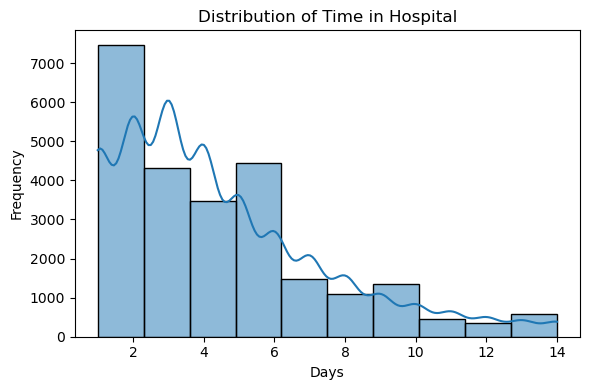

In [358]:
plt.figure(figsize=(6, 4))
sns.histplot(b['time_in_hospital'], bins=10, kde=True)
plt.title("Distribution of Time in Hospital")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

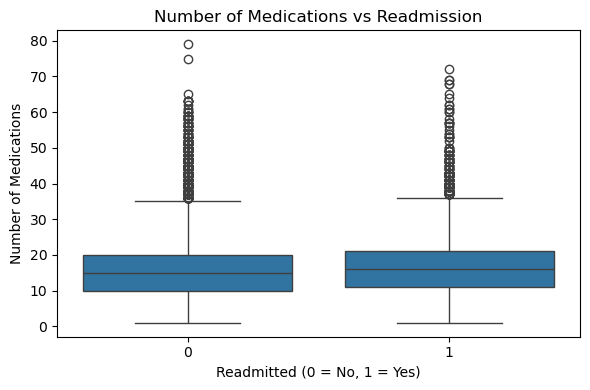

In [350]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="readmitted", y="n_medications", data=b)
plt.title("Number of Medications vs Readmission")
plt.xlabel("Readmitted (0 = No, 1 = Yes)")
plt.ylabel("Number of Medications")
plt.tight_layout()
plt.show()

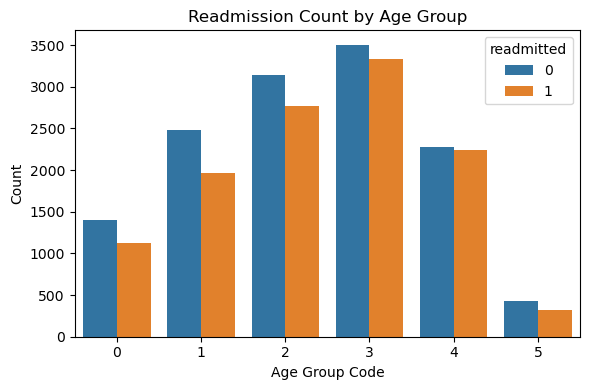

In [352]:
plt.figure(figsize=(6, 4))
sns.countplot(x="age", hue="readmitted", data=b)
plt.title("Readmission Count by Age Group")
plt.xlabel("Age Group Code")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

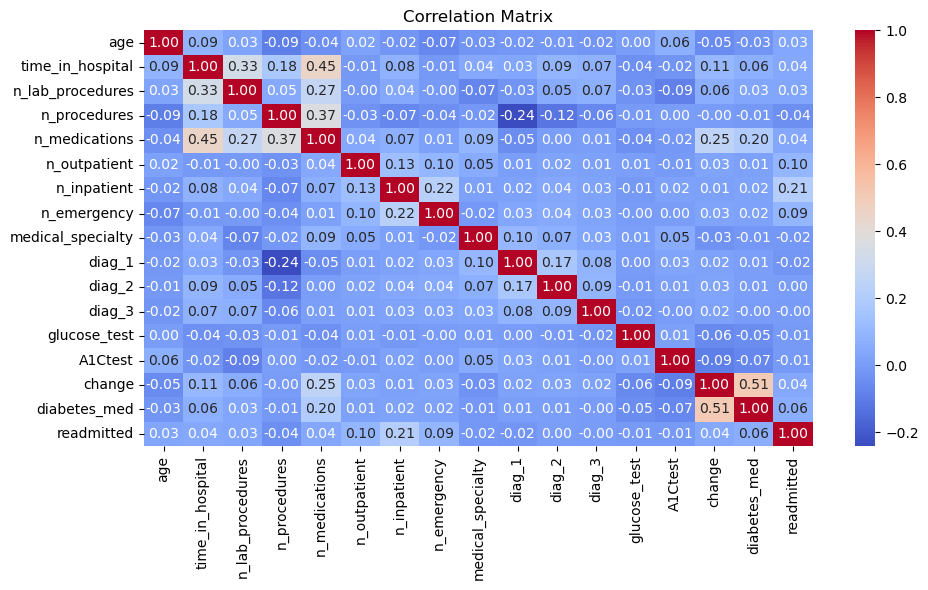

In [354]:
plt.figure(figsize=(10, 6))
sns.heatmap(b.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

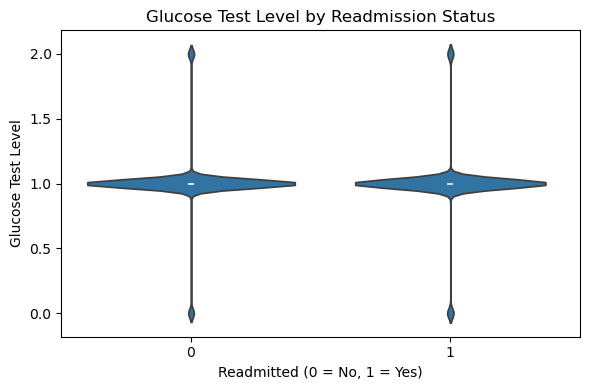

In [368]:
plt.figure(figsize=(6, 4))
sns.violinplot(x="readmitted", y="glucose_test", data=b, inner="box")
plt.title("Glucose Test Level by Readmission Status")
plt.xlabel("Readmitted (0 = No, 1 = Yes)")
plt.ylabel("Glucose Test Level")
plt.tight_layout()
plt.show()